# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Correlation matrix
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

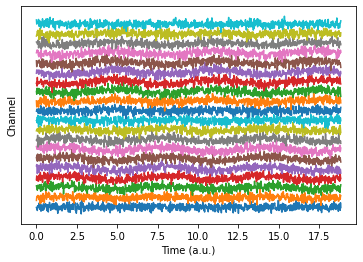

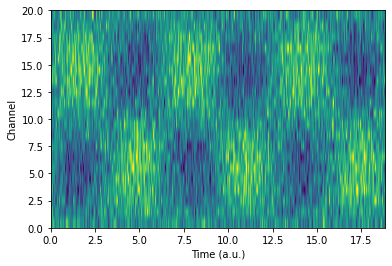

In [8]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]

data = data + np.random.randn(M,N)
    

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

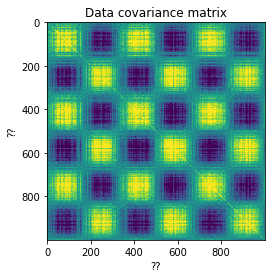

In [3]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data.T)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

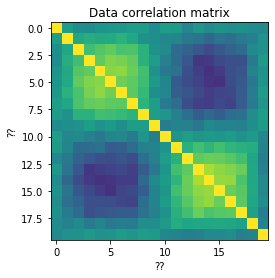

In [4]:
## and now the correlation matrix

# note the size of the output!
dataCorrMat = np.corrcoef(data)

plt.imshow(dataCorrMat,vmin=-.5,vmax=.5)
plt.title('Data correlation matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

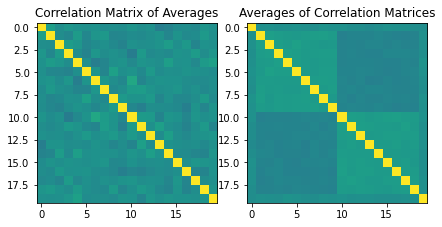

In [9]:
# simulation parameters
N = 1000  # time points
M =   20  # channels
 
# time vector (radian units)
t = np.linspace(0,6*np.pi,N)
 
# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))
 
#create noise
noise = np.linspace(0.00001, 3700, 20)
 
#initialize data lists
data_list = []
corr_matrices = []
 
#initialize data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]
 
#create the matrices
for idx, n in enumerate(noise):
    data_list.append(data + np.random.randn(M,N)*n)
    data_mean = sum(data_list)/len(data_list)
    corr_mat = np.corrcoef(data_mean)
    corr_matrices.append(np.corrcoef(data_list[idx]))
    corr_mean = sum(corr_matrices)/len(corr_matrices)
 
 
fig, ax = plt.subplots(1,2)
 
ax[0].imshow(corr_mat,vmin=-.5,vmax=.5)
ax[0].set_title('Correlation Matrix of Averages')
ax[1].imshow(corr_mean,vmin=-.5,vmax=.5)
ax[1].set_title('Averages of Correlation Matrices')
plt.tight_layout() 

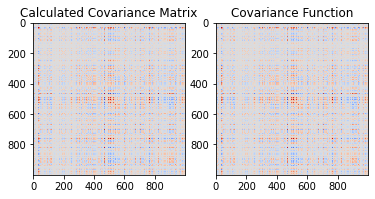

In [16]:
x = np.random.randn(N,3)
 
 
cov_matrix = np.cov(x)
cor_matrix = np.corrcoef(x)
 
sigma_matrix = np.zeros((N,N))
 
for i in range(len(x)):
    std_dev = np.std(x[i],ddof=1)
    sigma_matrix[i,i] = std_dev
    
 
calc_cov = np.dot(sigma_matrix,cor_matrix)
calc_cov = np.dot(calc_cov,sigma_matrix)
fig, ax = plt.subplots(1,2)
 
ax[0].imshow(calc_cov,cmap='coolwarm',vmin=-.5,vmax=.5)
ax[0].set_title('Calculated Covariance Matrix')
ax[1].imshow(cov_matrix,cmap='coolwarm', vmin=-.5,vmax=.5)
ax[1].set_title('Covariance Function')
plt.show()